In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("bmw.csv")
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [ ]:
df.shape

(10781, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [ ]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


In [ ]:
df[df.isnull().any(axis=1)]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [ ]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [ ]:
df[df.duplicated()]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
174,X4,2019,33998,Semi-Auto,7272,Diesel,150,42.8,2.0
393,X1,2018,16995,Semi-Auto,17276,Petrol,150,46.3,1.5
709,2 Series,2014,11999,Manual,31289,Diesel,30,62.8,2.0
957,1 Series,2019,21898,Manual,4100,Petrol,150,41.5,1.5
1173,1 Series,2017,20995,Semi-Auto,31544,Petrol,145,39.8,3.0
...,...,...,...,...,...,...,...,...,...
7808,5 Series,2019,31550,Automatic,1550,Hybrid,140,156.9,2.0
9096,M4,2020,45488,Automatic,10,Petrol,150,34.0,3.0
9797,4 Series,2019,25449,Automatic,6890,Diesel,145,65.7,2.0
9940,M3,2009,16950,Manual,65000,Petrol,580,21.9,4.0


In [ ]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True,drop=True)

In [ ]:
df.sample(2)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10264,3 Series,2017,26590,Automatic,21337,Diesel,200,49.6,3.0
6800,X2,2019,30789,Semi-Auto,3795,Diesel,145,58.9,2.0


In [ ]:
numerical_features=[col for col in df.columns if df[col].dtype!="object"]
categorical_features=[col for col in df.columns if df[col].dtype=="object"]
print("we have {} numerical features :{}".format(len(numerical_features),numerical_features))
print("We ahve {} Categorical features : {}".format(len(categorical_features),categorical_features))


we have 6 numerical features :['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']
We ahve 3 Categorical features : ['model', 'transmission', 'fuelType']


In [ ]:
for col in categorical_features:
    print(col)
    print("----------")
    print("We have {} unique categories in {} feature : {} ".format(df[col].nunique(),col,df[col].unique()))

model
----------
We have 24 unique categories in model : [' 5 Series' ' 6 Series' ' 1 Series' ' 7 Series' ' 2 Series' ' 4 Series'
 ' X3' ' 3 Series' ' X5' ' X4' ' i3' ' X1' ' M4' ' X2' ' X6' ' 8 Series'
 ' Z4' ' X7' ' M5' ' i8' ' M2' ' M3' ' M6' ' Z3'] 
transmission
----------
We have 3 unique categories in transmission : ['Automatic' 'Manual' 'Semi-Auto'] 
fuelType
----------
We have 5 unique categories in fuelType : ['Diesel' 'Petrol' 'Other' 'Hybrid' 'Electric'] 


Text(0.5, 1.0, ' Top 10 BMW Series share')

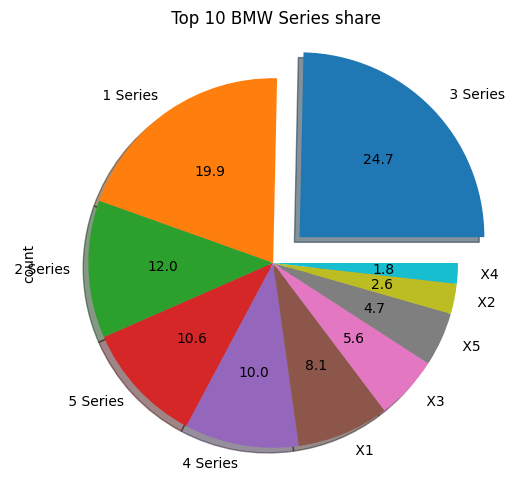

In [ ]:
plt.figure(figsize=(8,6))

df["model"].value_counts()[:10].plot.pie(y=df["model"],autopct="%1.1f",shadow=True,explode=[0.2,0,0,0,0,0,0,0,0,0])
plt.title(" Top 10 BMW Series share")

<span style="color:orange">Observation:The BMW 3 series model sold 24.7% and which is higher in the dataset. </span>

In [ ]:
model_counts=df["model"].value_counts().sort_values(ascending=False).reset_index()


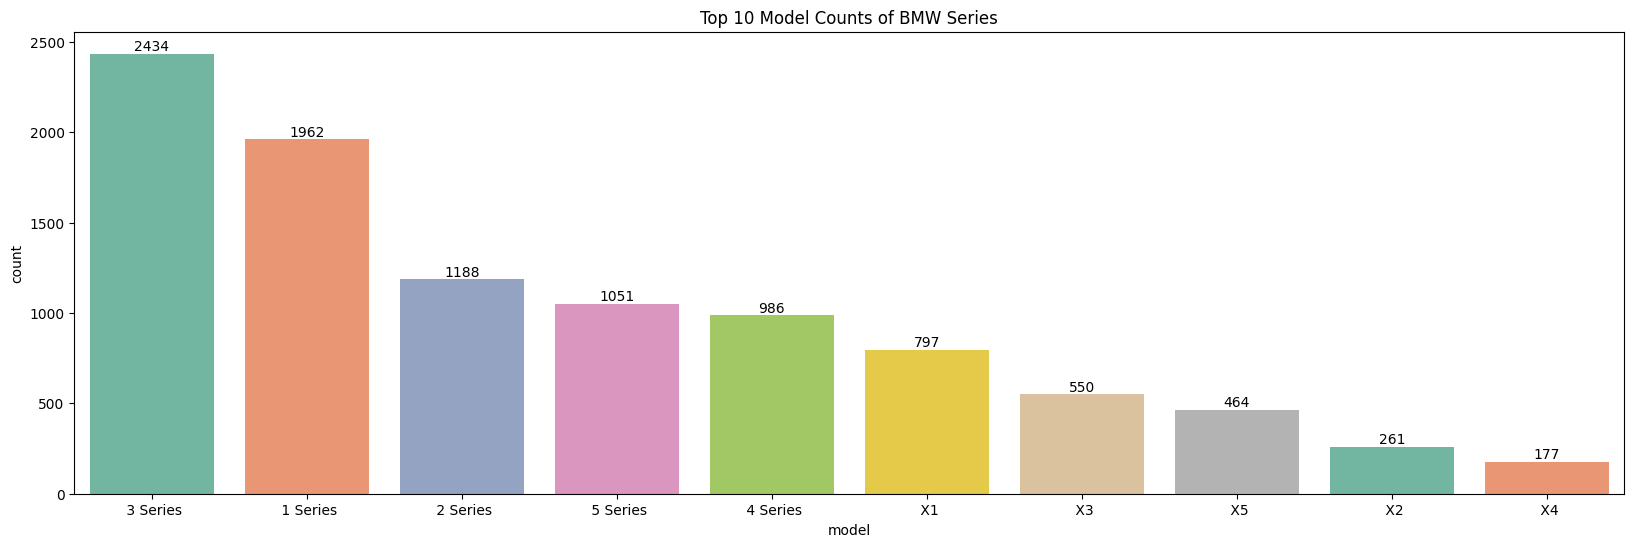

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(20,6))
sns.barplot(x=model_counts["model"][:10],y=model_counts["count"][:10],data=model_counts,palette="Set2",ax=ax)
ax.set_title("Top 10 Model Counts of BMW Series")
for container in ax.containers:
    ax.bar_label(container,color="black")

In [ ]:
df.shape

(10664, 9)

*Observation:Total 2434 cars are sold in the dataset out of 10664*

In [ ]:
for col in categorical_features:
    print(col)
    print("**********")
    print(df[col].value_counts(normalize=True)*100)

model
**********
model
3 Series    22.824456
1 Series    18.398350
2 Series    11.140285
5 Series     9.855589
4 Series     9.246062
X1           7.473743
X3           5.157539
X5           4.351088
X2           2.447487
X4           1.659790
M4           1.144036
6 Series     1.012753
Z4           1.003376
7 Series     0.993998
X6           0.993998
X7           0.515754
i3           0.403226
8 Series     0.365716
M5           0.271943
M3           0.243811
M2           0.196924
i8           0.159415
M6           0.075019
Z3           0.065641
Name: proportion, dtype: float64
transmission
**********
transmission
Semi-Auto    43.482746
Automatic    33.214554
Manual       23.302701
Name: proportion, dtype: float64
fuelType
**********
fuelType
Diesel      65.528882
Petrol      31.320330
Hybrid       2.785071
Other        0.337584
Electric     0.028132
Name: proportion, dtype: float64


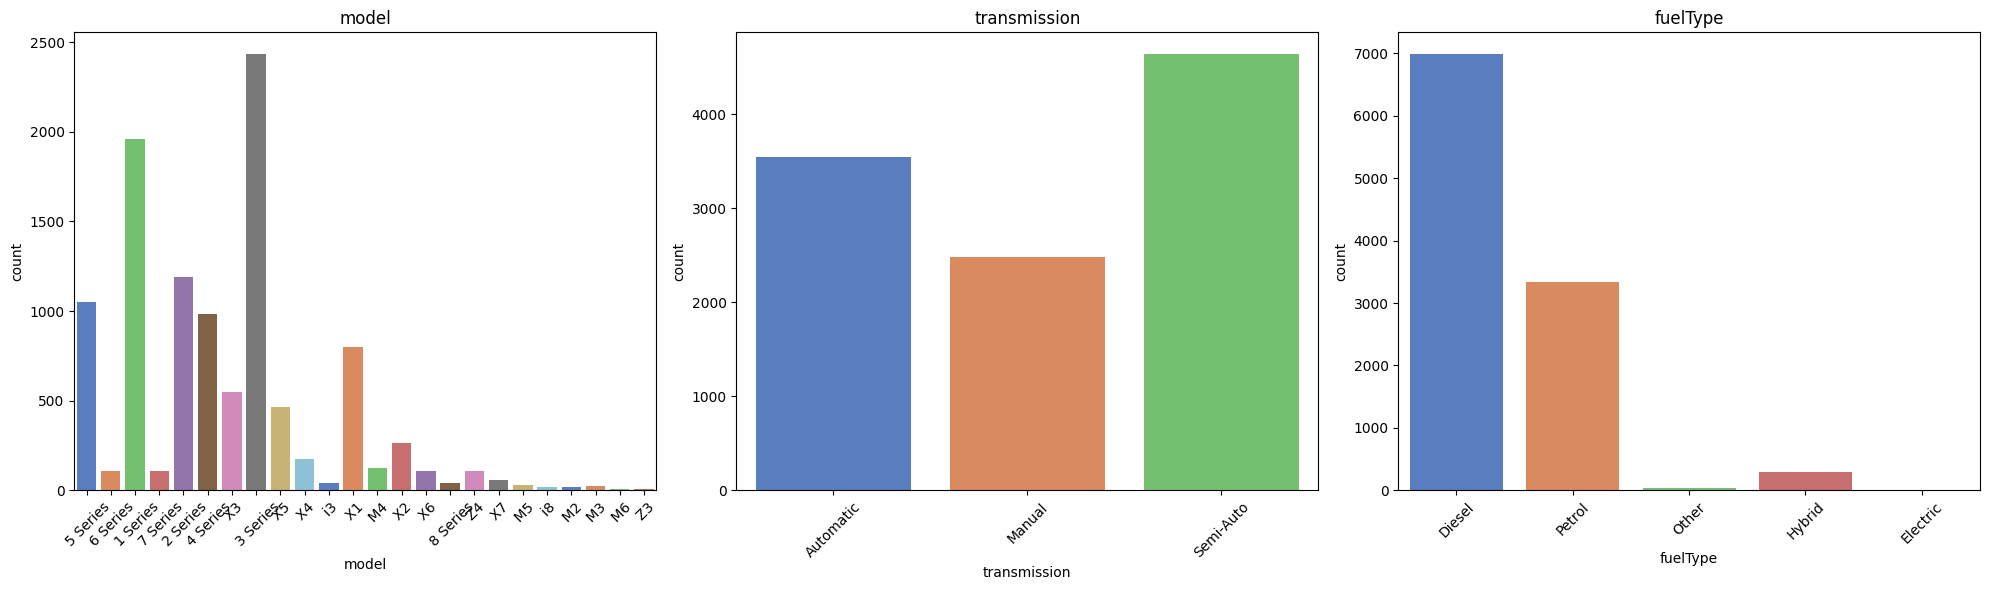

In [ ]:
plt.figure(figsize=(20,6))

for i in range(len(categorical_features)):
    
    plt.subplot(1,3,i+1)
    sns.countplot(x=df[categorical_features[i]],data=df,palette="muted")
    plt.title(categorical_features[i])
   
    plt.xticks(rotation=45)
    plt.tight_layout()


<span style="color:pink">Observation1(fig2):Semi Automated cars more are sold in the dataset </span>

<span style="color:lightyellow">Observation2(fig3):Diesel cars are more sold in the dataset</span>

In [ ]:
model_price_sums=df.groupby("model")["price"].sum().sort_values(ascending=False)[:10].reset_index()


Text(0.5, 1.0, 'Top 10 Models by Total Price')

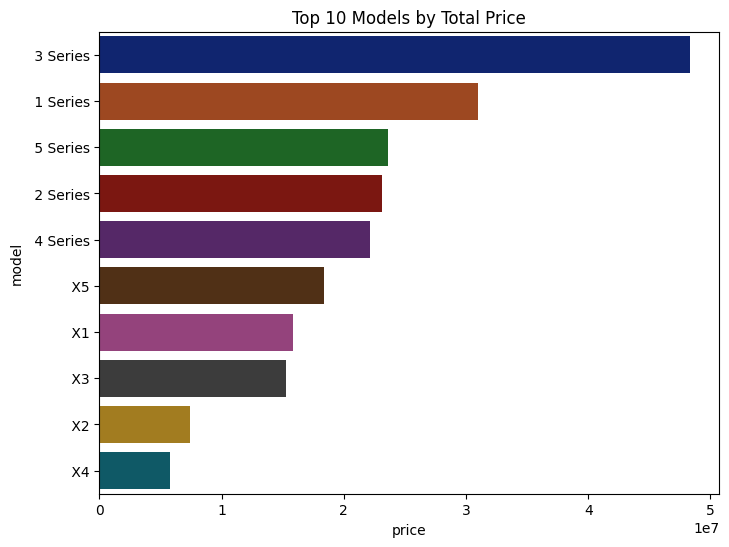

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x="price",y="model",data=model_price_sums,orient="h",palette="dark")
plt.title("Top 10 Models by Total Price")

###The Comapny getting more amount by selling BMW series 3 model

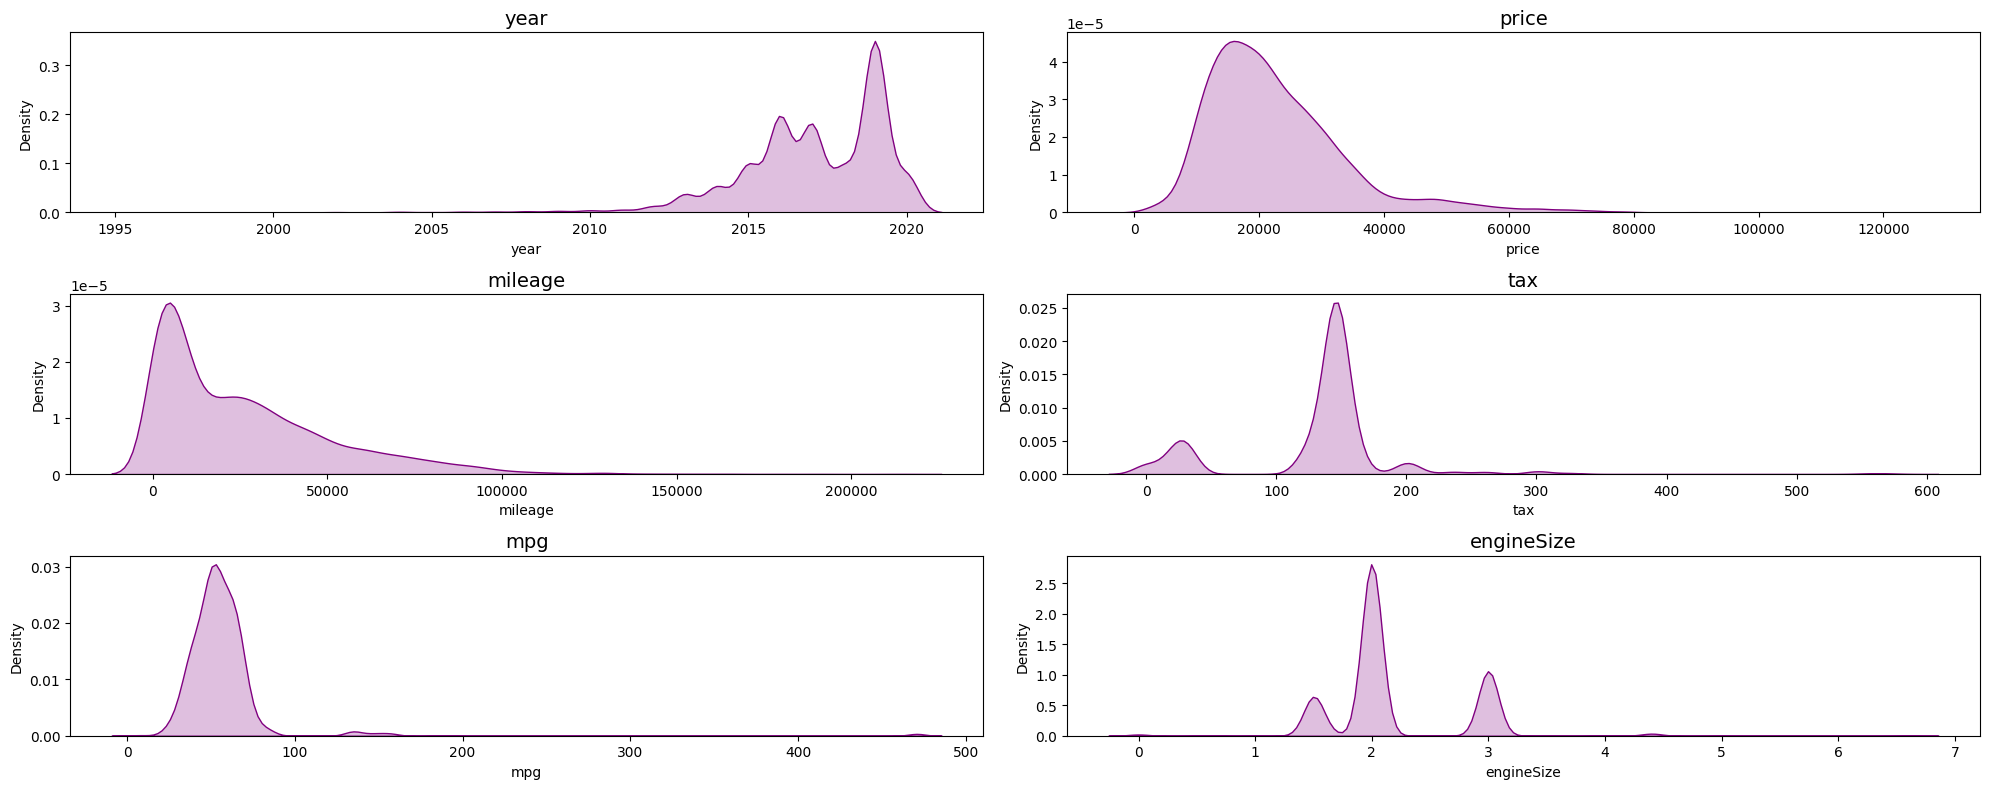

In [ ]:
plt.figure(figsize=(20,8))

for i in range(len(numerical_features)):
    plt.subplot(3,2,i+1)
    sns.kdeplot(x=df[numerical_features[i]],data=df,fill=True,color="purple")
    plt.title(numerical_features[i],color="black",fontsize=14)
    plt.tight_layout()

In [ ]:
df.tail(4)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10660,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10661,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10662,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0
10663,X1,2017,15981,Automatic,59432,Diesel,125,57.6,2.0


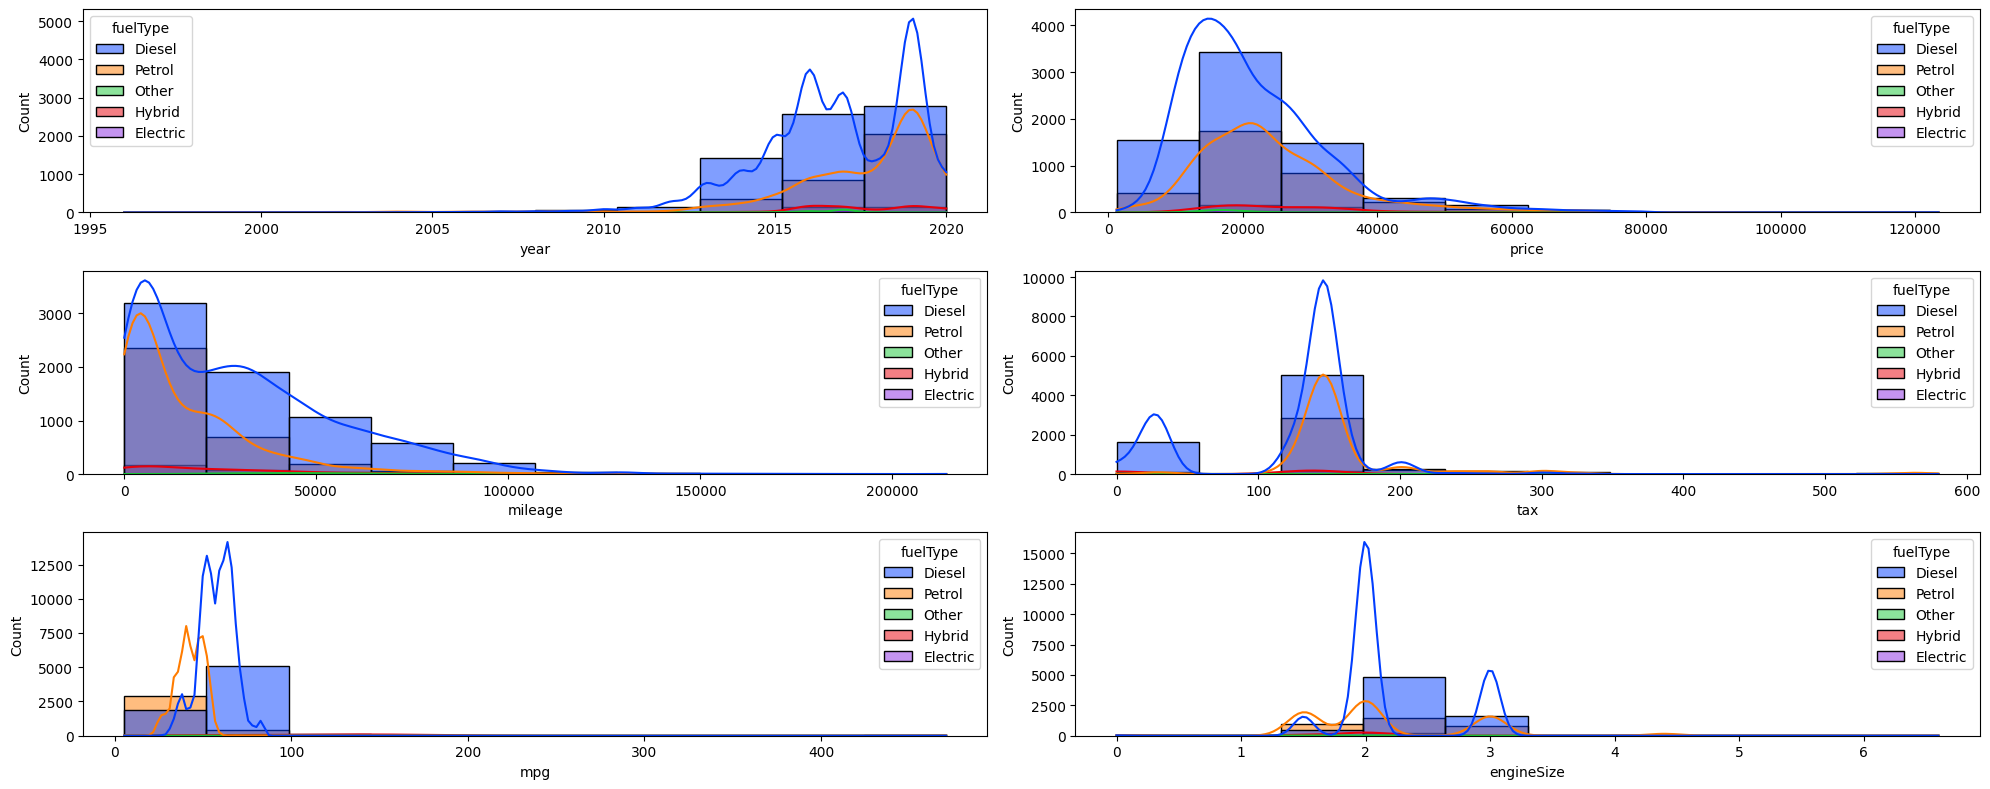

In [ ]:
plt.figure(figsize=(20,8))
for i in range(len(numerical_features)):
    plt.subplot(3,2,i+1)
    sns.histplot(x=df[numerical_features[i]],data=df,hue="fuelType",palette="bright",fill=True,kde=True,bins=10)
    plt.tight_layout()

<Axes: >

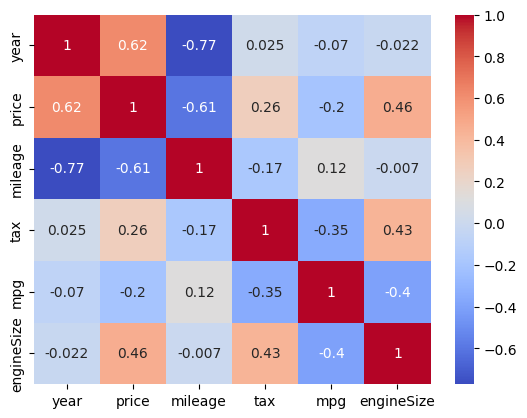

In [ ]:
corr=df.corr(numeric_only=True)
sns.heatmap(corr,annot=True,cmap="coolwarm")

**observation:High correlation present price and year**

In [ ]:
df["transmission"].unique()

array(['Automatic', 'Manual', 'Semi-Auto'], dtype=object)

In [ ]:
model_kms=df.groupby("model")["mileage"].sum().sort_values(ascending=False).reset_index()[:10]
model_kms.rename(columns={"mileage":"Total_Kms"},inplace=True)
    

In [ ]:
model_kms

,model,Total_Kms
0,3 Series,77683518
1,1 Series,54861142
2,5 Series,32421882
3,4 Series,21626446
4,2 Series,20891744
5,X1,20208501
6,X3,14749575
7,X5,11623456
8,X4,3645976
9,6 Series,3422003


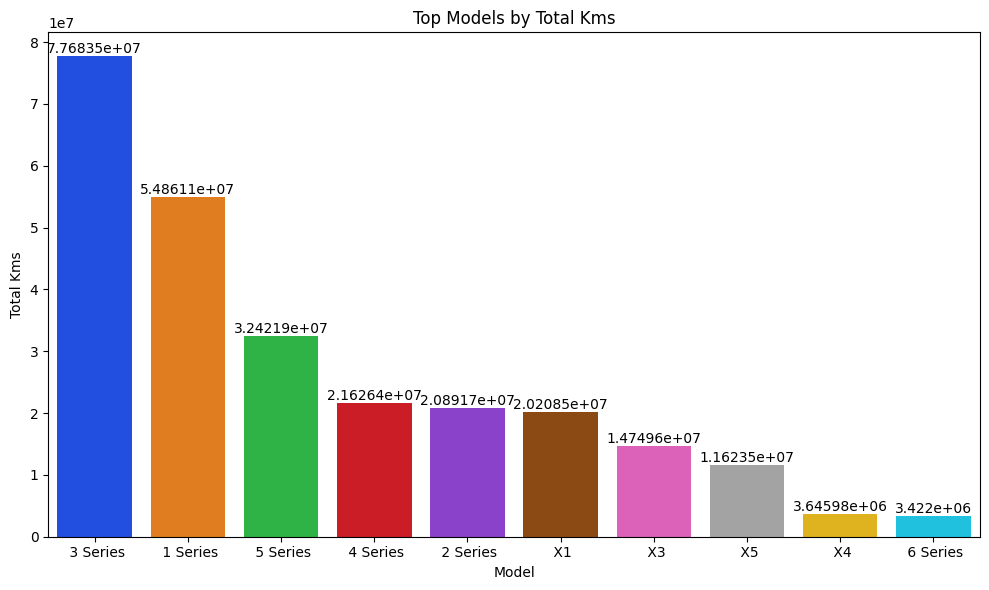

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(10, 6))

sns.barplot(data=model_kms,x="model",y="Total_Kms", ax=axs, palette="bright")
for container in axs.containers:
    axs.bar_label(container,color="black")
axs.set_xlabel("Model")
axs.set_ylabel("Total Kms")
axs.set_title("Top Models by Total Kms")
plt.tight_layout()
plt.show()



In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encoder=OrdinalEncoder(categories=[["Automatic","Semi-Auto","Manual"]])
encoded=encoder.fit_transform(df[["transmission"]])
encoded_df=pd.DataFrame(encoded,columns=["transmission_encoded"])
df.drop("transmission",axis=1,inplace=True)
pd.concat([df,encoded_df],axis=1)

,model,year,price,mileage,fuelType,tax,mpg,engineSize,transmission_encoded
0,5 Series,2014,11200,67068,Diesel,125,57.6,2.0,0.0
1,6 Series,2018,27000,14827,Petrol,145,42.8,2.0,0.0
2,5 Series,2016,16000,62794,Diesel,160,51.4,3.0,0.0
3,1 Series,2017,12750,26676,Diesel,145,72.4,1.5,0.0
4,7 Series,2014,14500,39554,Diesel,160,50.4,3.0,0.0
...,...,...,...,...,...,...,...,...,...
10659,X3,2016,19000,40818,Diesel,150,54.3,2.0,0.0
10660,5 Series,2016,14600,42947,Diesel,125,60.1,2.0,0.0
10661,3 Series,2017,13100,25468,Petrol,200,42.8,2.0,2.0
10662,1 Series,2014,9930,45000,Diesel,30,64.2,2.0,0.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_columns=df.select_dtypes(include="object").columns
encoder=OneHotEncoder()
encoded=encoder.fit_transform(df[[categorical_columns[0]]]).toarray()
df1=pd.DataFrame(encoded,columns=encoder.get_feature_names_out())
df.drop("model",axis=1,inplace=True)
df=pd.concat([df,df1],axis=1)


In [ ]:
df.shape

(10664, 31)

In [ ]:
encoded=encoder.fit_transform(df[[categorical_columns[1]]]).toarray()
df2=pd.DataFrame(encoded,columns=encoder.get_feature_names_out())
df.drop("fuelType",axis=1,inplace=True)
df=pd.concat([df,df2],axis=1)




In [ ]:
df.shape

(10664, 35)

In [ ]:
df.to_csv("Cleaned_Bmw.csv")